In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
import sklearn.metrics as metrics

In [2]:
#Reading the data
data_train = pd.read_csv(r'C:\Users\Paritosh Kumar\Desktop\dataset\DataSet_Train.csv')

In [3]:
#Dropping columns Id
data_train=data_train.drop(columns =['Id'])

In [4]:
data_train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [5]:
#copying the data_train
Y=data_train.copy()

# Percentage Splits for each category for Street

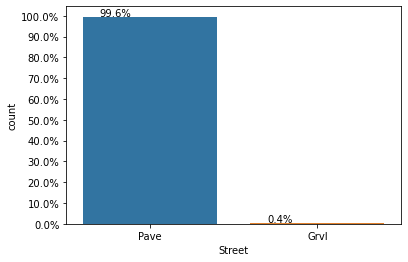

In [6]:

total = len(Y)*1.
ax=sns.countplot(x="Street", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

# Percentage Splits for each category for Neighborhood

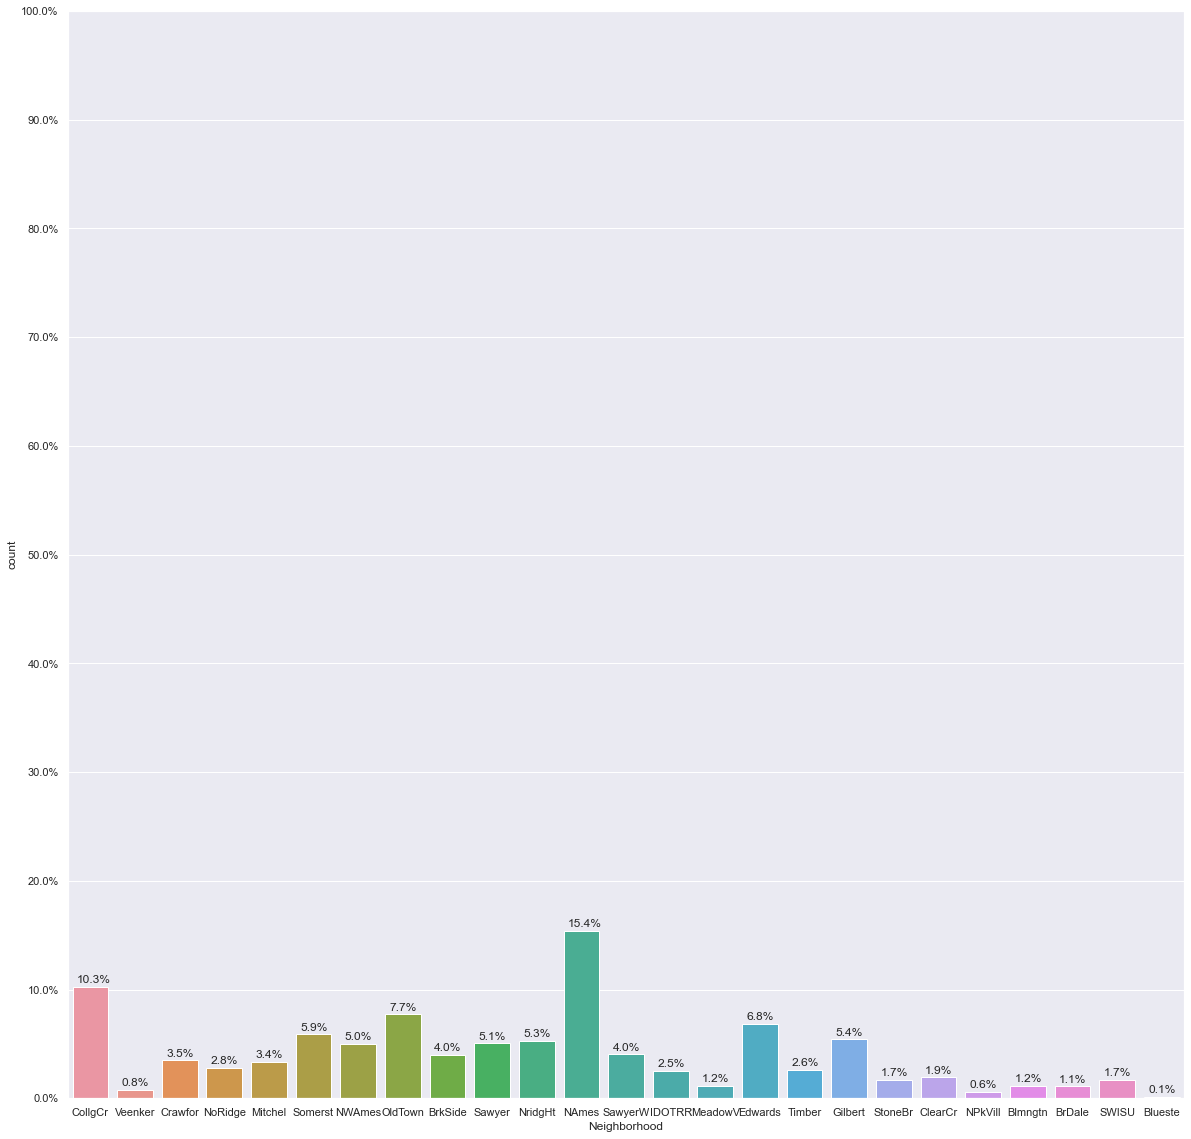

In [7]:
sns.set(rc={'figure.figsize':(20,20)})

total = len(Y)*1.
ax=sns.countplot(x="Neighborhood", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

# Percentage Splits for each category for HouseStyle

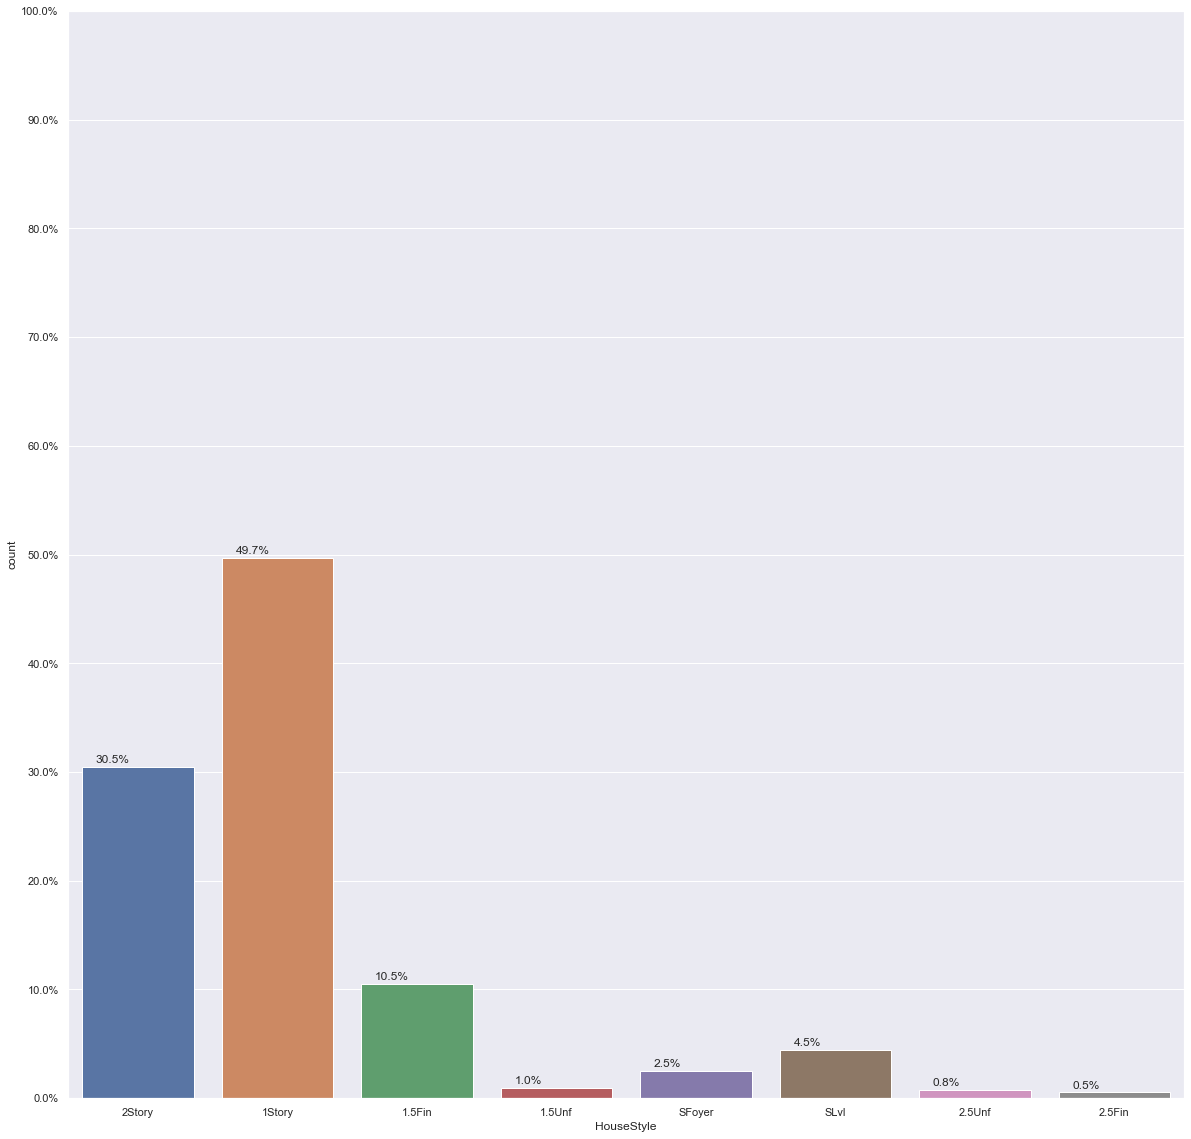

In [8]:
sns.set(rc={'figure.figsize':(20,20)})

total = len(Y)*1.
ax=sns.countplot(x="HouseStyle", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [ ]:
#Note:1 story building has the highest count

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

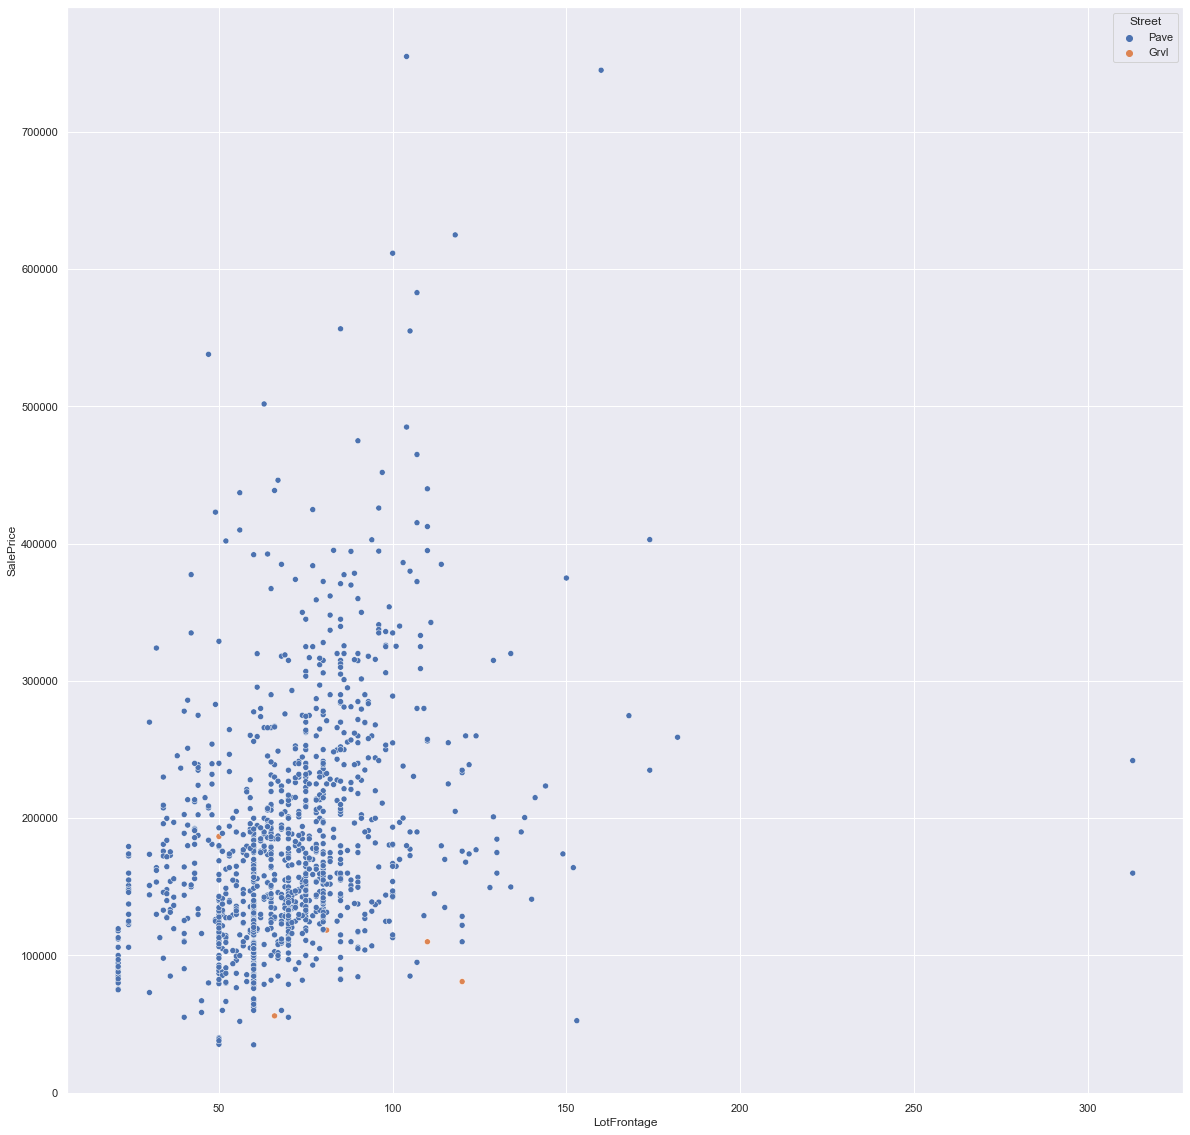

In [9]:
#Scatter plot for LotFrontage & Sales Price
sns.scatterplot(x="LotFrontage",y="SalePrice",hue="Street",data=Y)

In [ ]:
#Note :Different Streets is not impacting the SalesPrice

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

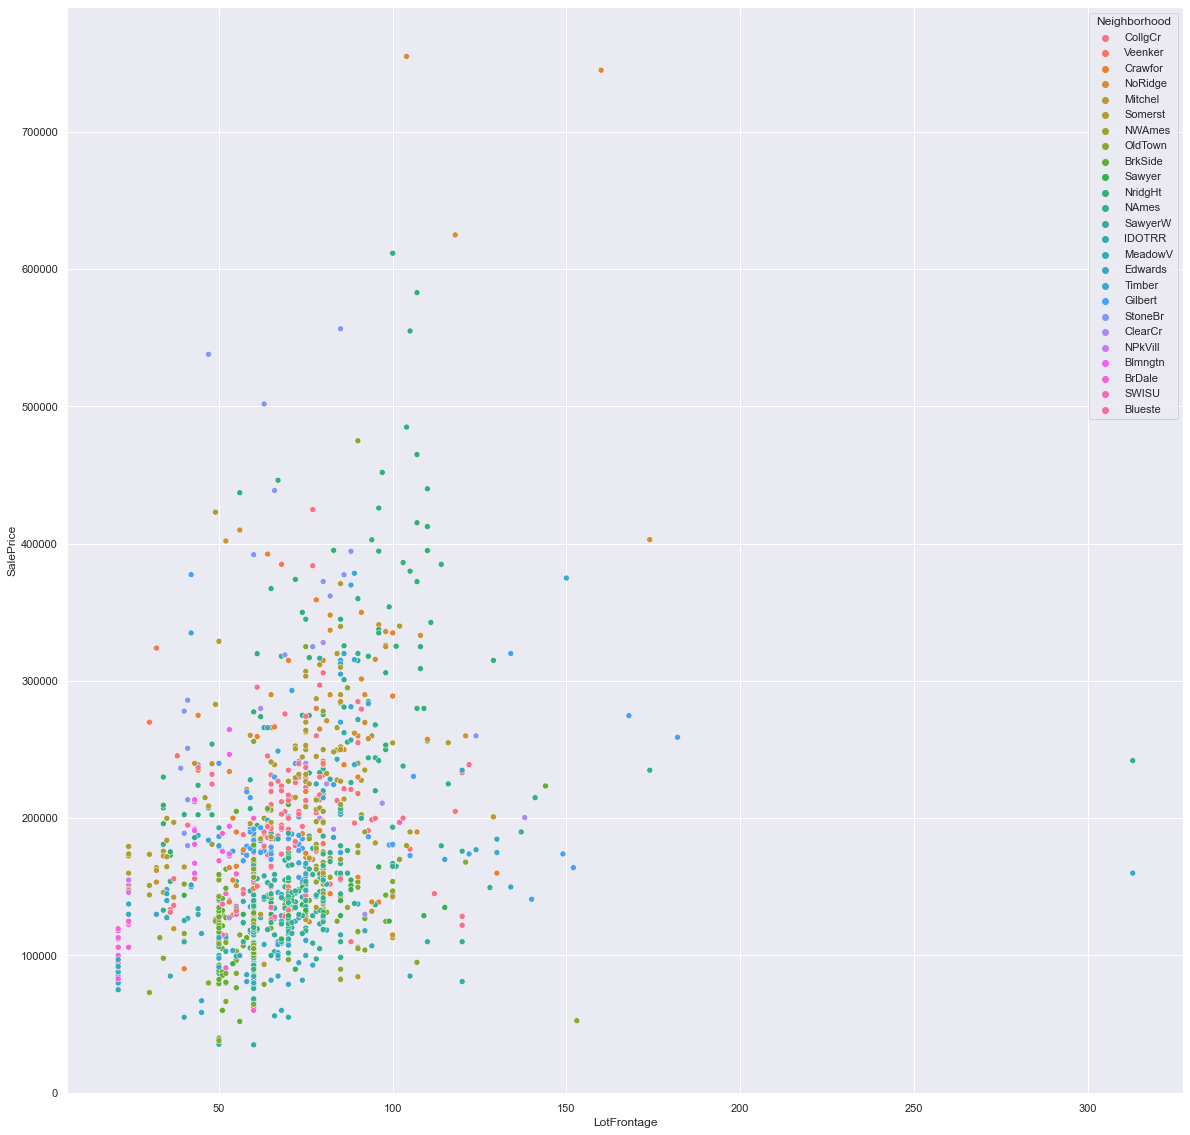

In [10]:
#Scatter plot for LotFrontage & Sales Price with different Neighbourhood
sns.scatterplot(x="LotFrontage",y="SalePrice",hue="Neighborhood",data=Y)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

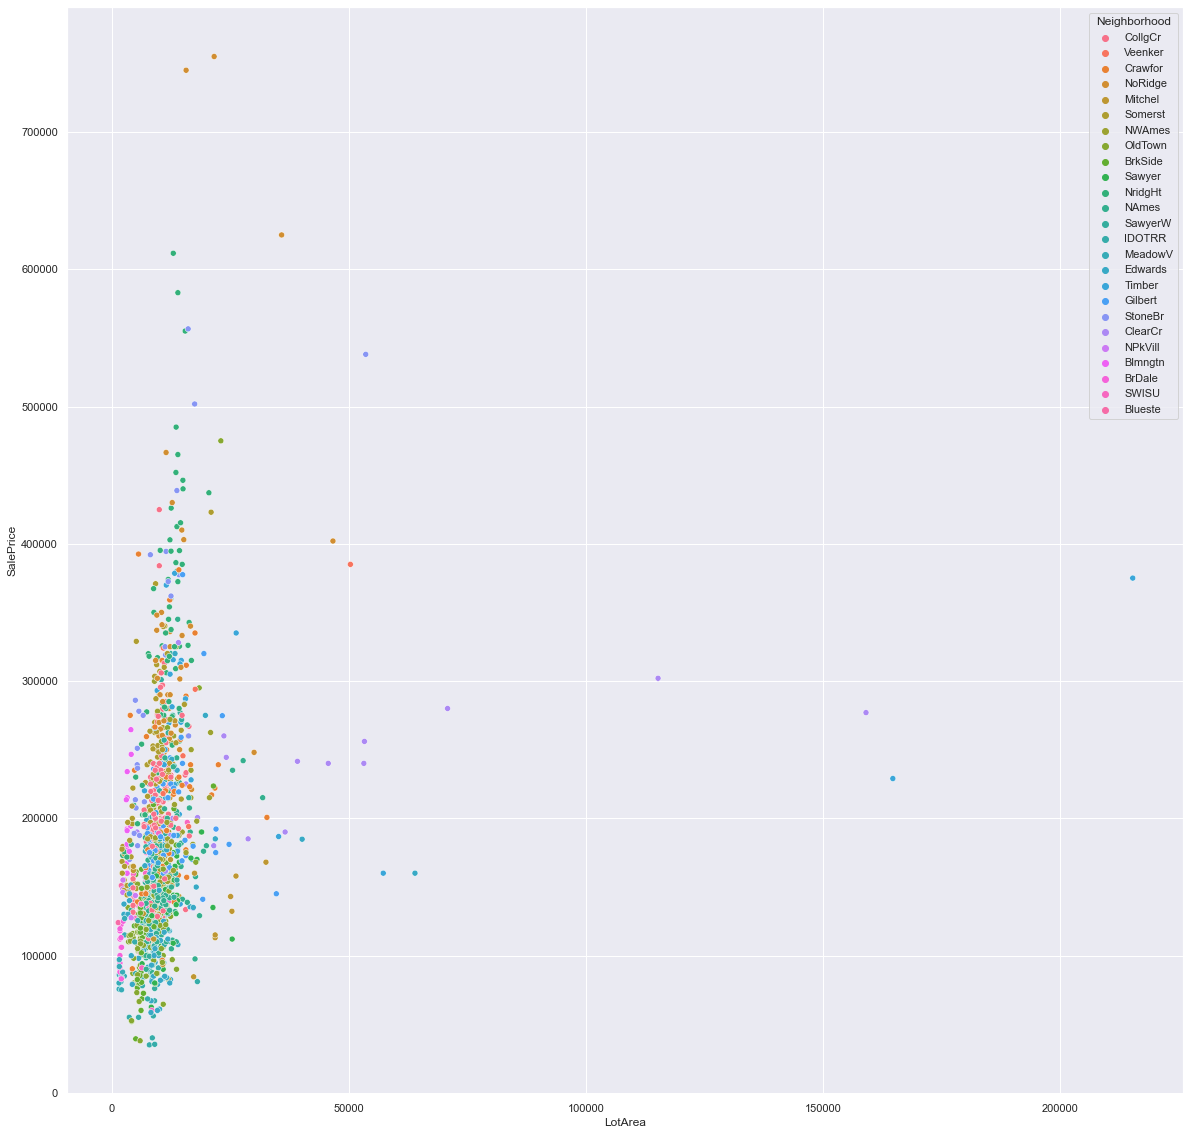

In [11]:
#Scatter plot for LotArea & Sales Price with different Neighbourhood
sns.scatterplot(x="LotArea",y="SalePrice",hue="Neighborhood",data=Y)

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

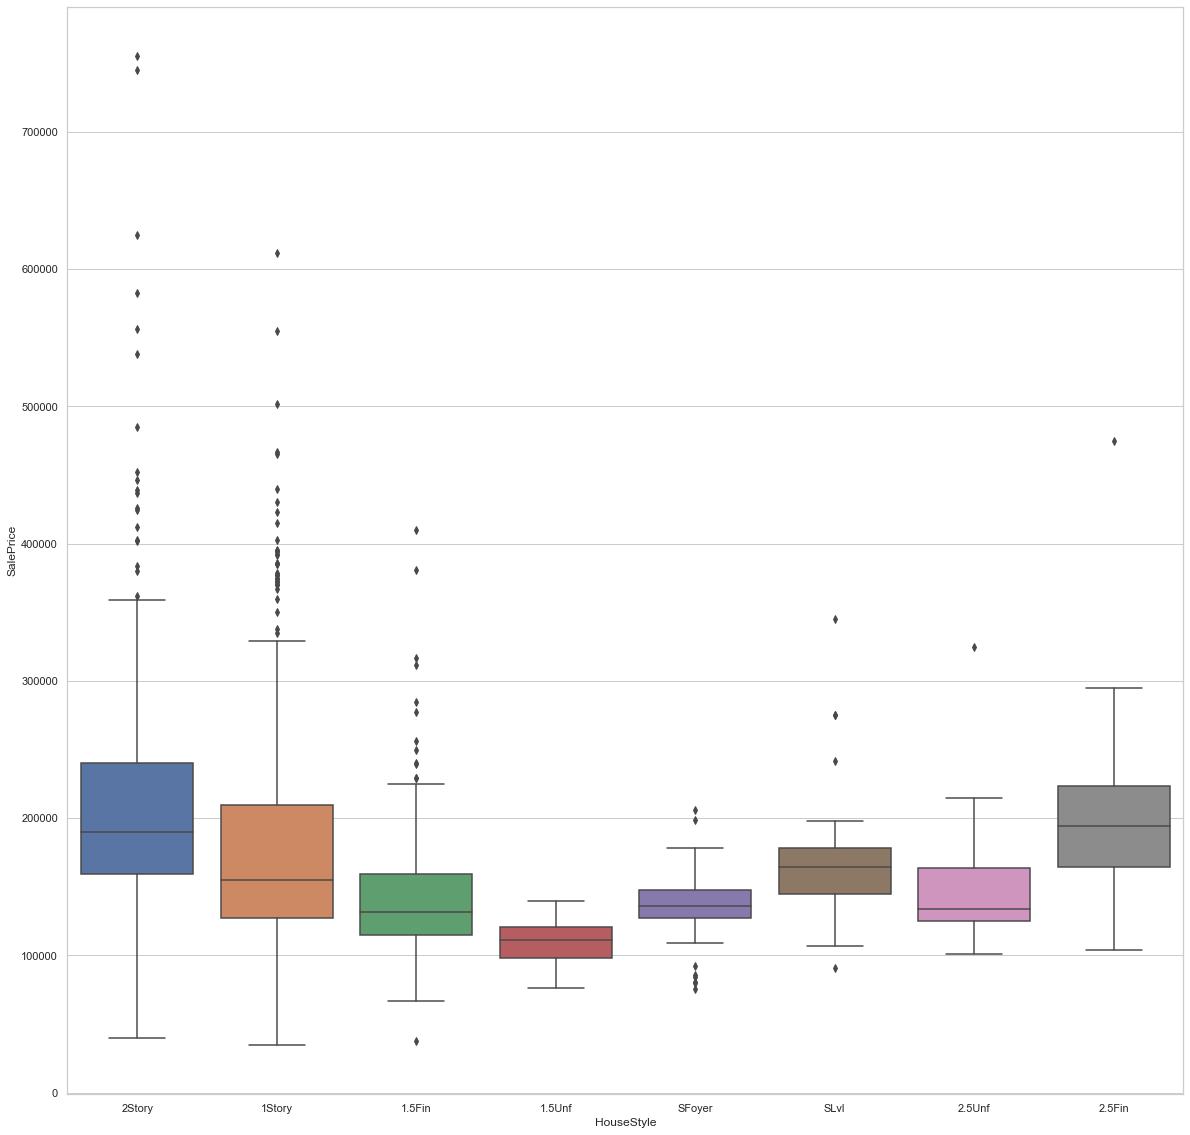

In [12]:
#Box plot to find the Saleprice wrt to Housestyle
sns.set_style("whitegrid")
  
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = Y)

In [ ]:
#Note: 2Story housestyle has the more price compare to other

In [13]:
#Barchart average cost of the housestyle
groupedvalues=Y.groupby('HouseStyle').mean()['SalePrice'].reset_index()

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

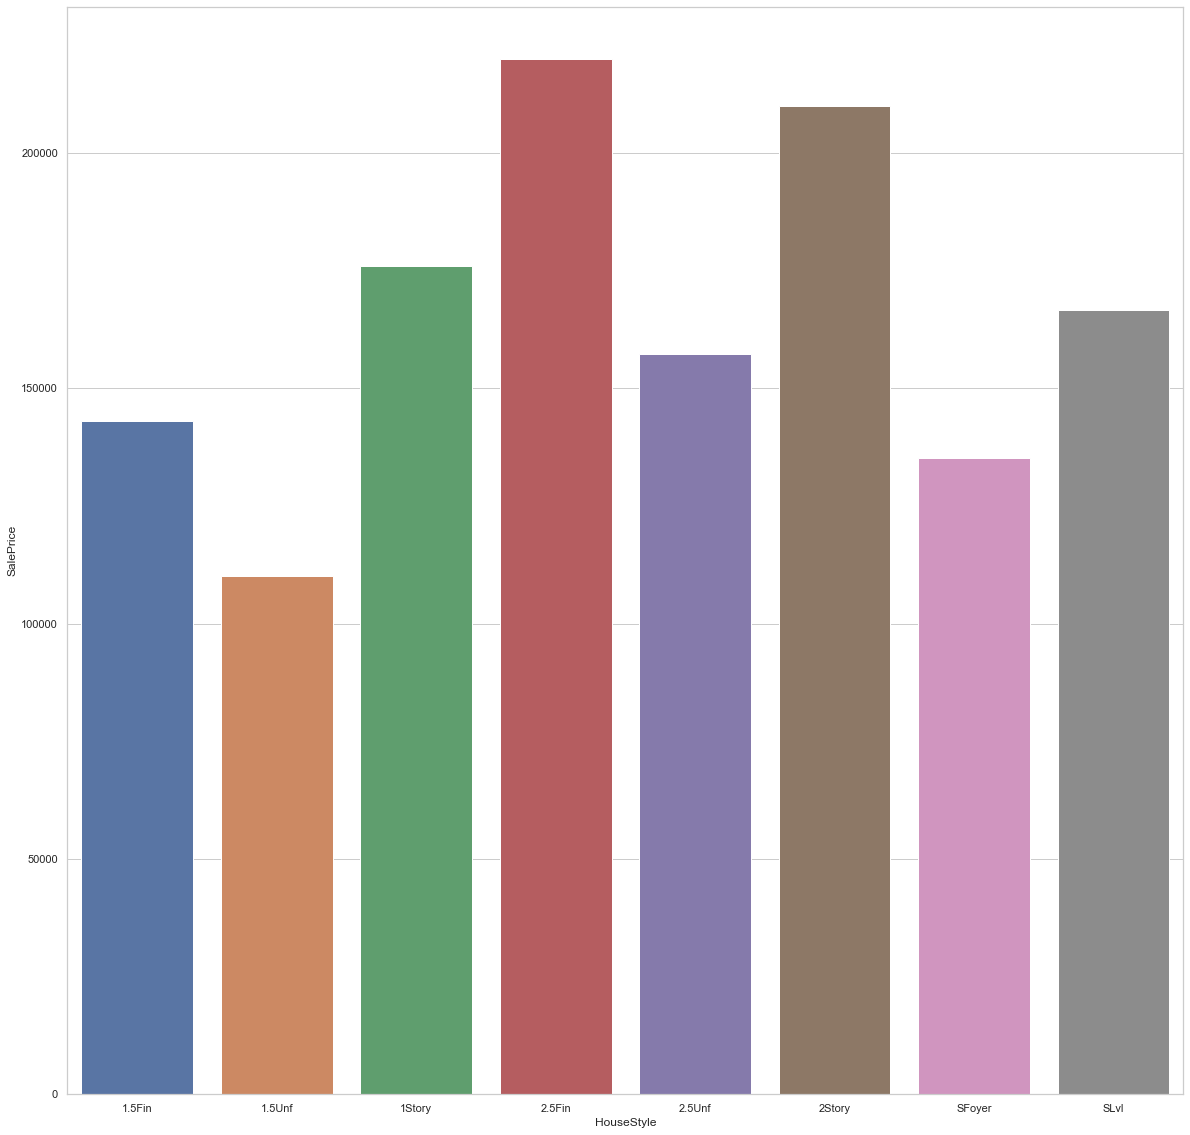

In [14]:
sns.barplot(x='HouseStyle',y='SalePrice',data=groupedvalues)

# SalePrice of House wrt Year built .Checking the percentage saleprice chage

<AxesSubplot:xlabel='YearBuilt', ylabel='House_cost_percentage_change'>

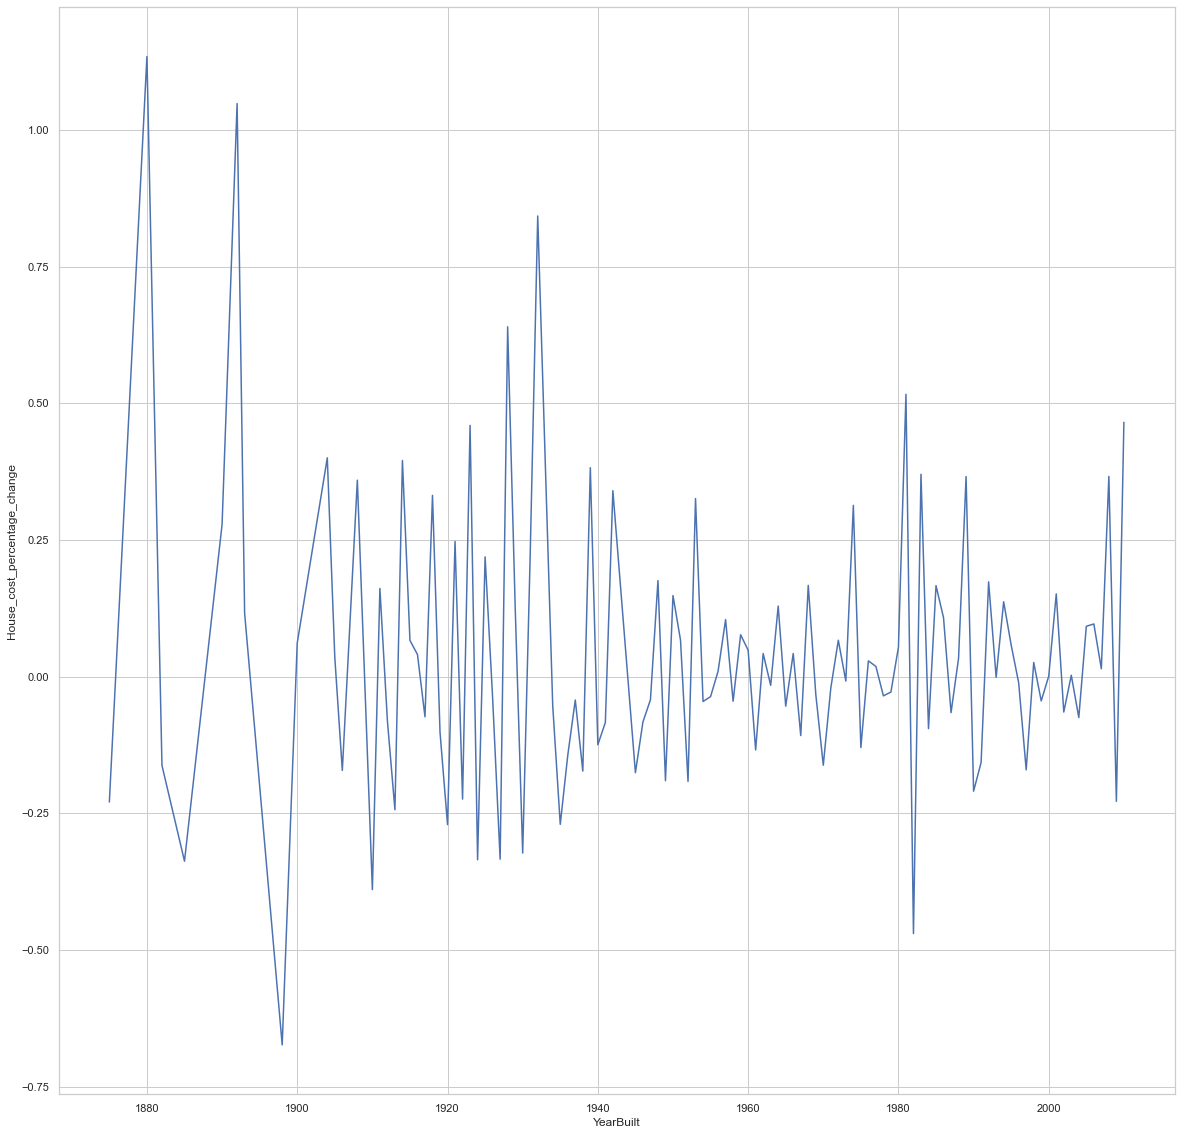

In [15]:

groupedvalues=Y.groupby('YearBuilt').mean()['SalePrice'].reset_index()
groupedvalues = groupedvalues.sort_values(by=['YearBuilt'], ascending=True)
groupedvalues['House_cost_percentage_change']=groupedvalues['SalePrice'].pct_change(fill_method ='ffill')
sns.lineplot(x='YearBuilt',y='House_cost_percentage_change',data=groupedvalues)

THis above plot is the percentage change in price of the house wrt to year


# Missing Values

In [16]:
Y.isnull().sum()
#LotFrontage has 259 null values

LotFrontage     259
LotArea           0
Street            0
Neighborhood      0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
GrLivArea         0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
SalePrice         0
dtype: int64

In [17]:
#How much percenatage is of Null values
(Y.isnull().sum()[0]/Y.shape[0])*100
#17 percentage of total data having null values

17.73972602739726

In [ ]:
#note:LotFrontage is having the missing values

In [18]:
#Correaltion matrix of each features
corr = Y.loc[:,['LotFrontage','LotArea','OverallQual','OverallCond','GrLivArea','FullBath','BedroomAbvGr','KitchenAbvGr']].corr()
corr

,LotFrontage,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.402797,0.198769,0.263170,-0.006069
LotArea,0.426095,1.000000,0.105806,-0.005636,0.263116,0.126031,0.119690,-0.017784
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.593007,0.550600,0.101676,-0.183882
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.079686,-0.194149,0.012980,-0.087001
GrLivArea,0.402797,0.263116,0.593007,-0.079686,1.000000,0.630012,0.521270,0.100063
FullBath,0.198769,0.126031,0.550600,-0.194149,0.630012,1.000000,0.363252,0.133115
BedroomAbvGr,0.263170,0.119690,0.101676,0.012980,0.521270,0.363252,1.000000,0.198597
KitchenAbvGr,-0.006069,-0.017784,-0.183882,-0.087001,0.100063,0.133115,0.198597,1.000000


<AxesSubplot:>

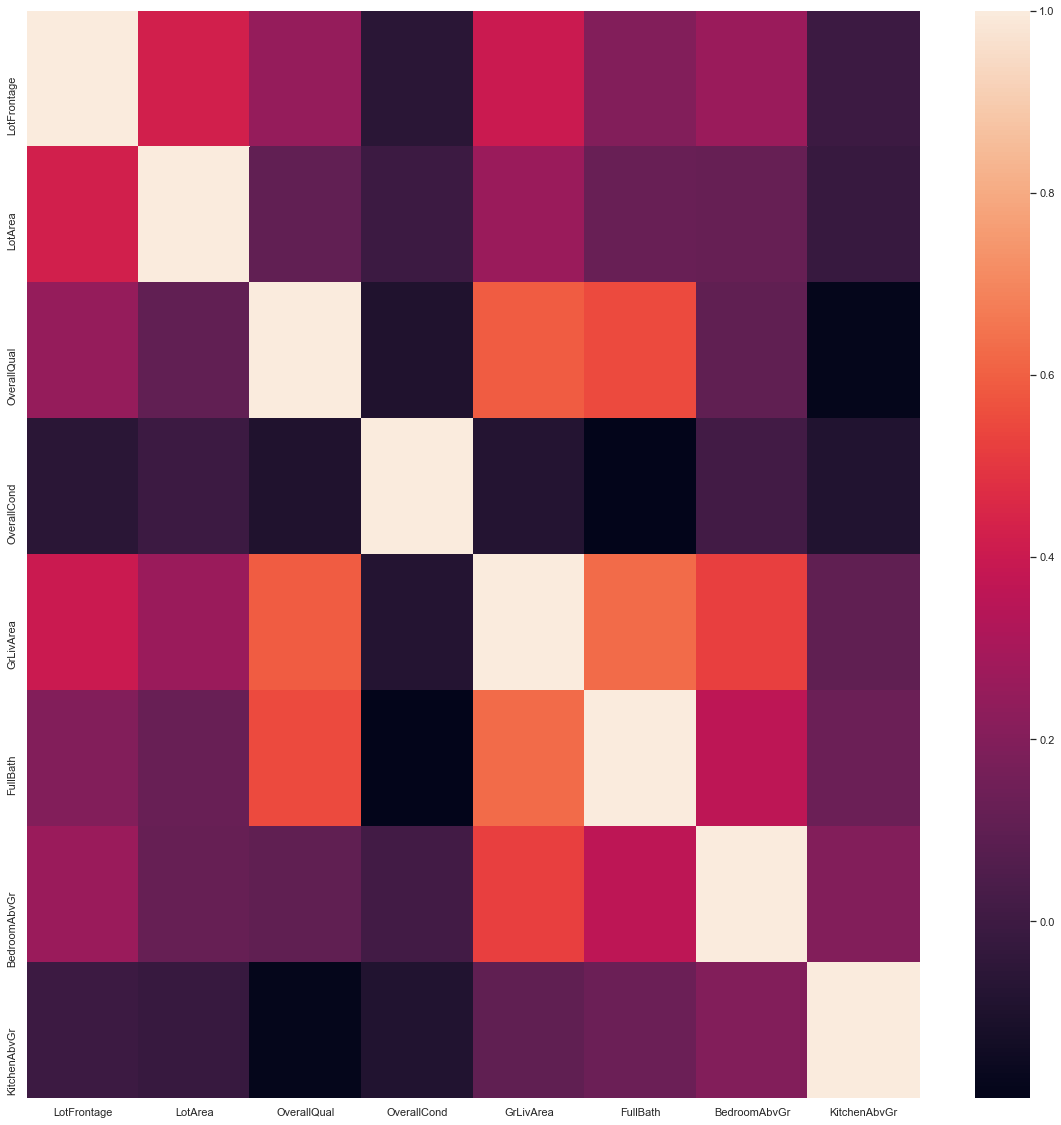

In [19]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Missing value impute

In [20]:
#We are buiding a regression model to find the missing values
df_impute=Y.loc[:,['LotFrontage','LotArea','OverallQual','OverallCond','GrLivArea','FullBath','BedroomAbvGr','KitchenAbvGr']]

In [21]:
#columns having missing values
missing_columns = ["LotFrontage"]

In [23]:
#Dropping the missing rows
df_im=df_impute.dropna(axis=0,subset=['LotFrontage'])
df_im= df_im.loc[:,:]

#Storing all the index of the null values
missing_bill =df_impute['LotFrontage'].isnull()

#tip_miss is the dataframe having the information of dependent features of missing row
tip_miss= pd.DataFrame(df_impute.loc[ : , df_impute.columns != 'LotFrontage'][missing_bill])

# Building a linear regression model to find the missing value

In [25]:
X=df_im.loc[:,df_im.columns != 'LotFrontage']
y=df_im['LotFrontage']
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

lm_impute=LinearRegression().fit(X_train,y_train)
bill_pred=lm_impute.predict(tip_miss)

In [26]:
Y=data_train.copy()
missing_bill =Y['LotFrontage'].isnull()

In [27]:
#imputed with the missing values with the predicted values of regression model
Y.loc[Y['LotFrontage'].isnull()==True,'LotFrontage']=bill_pred

# Removing oullier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


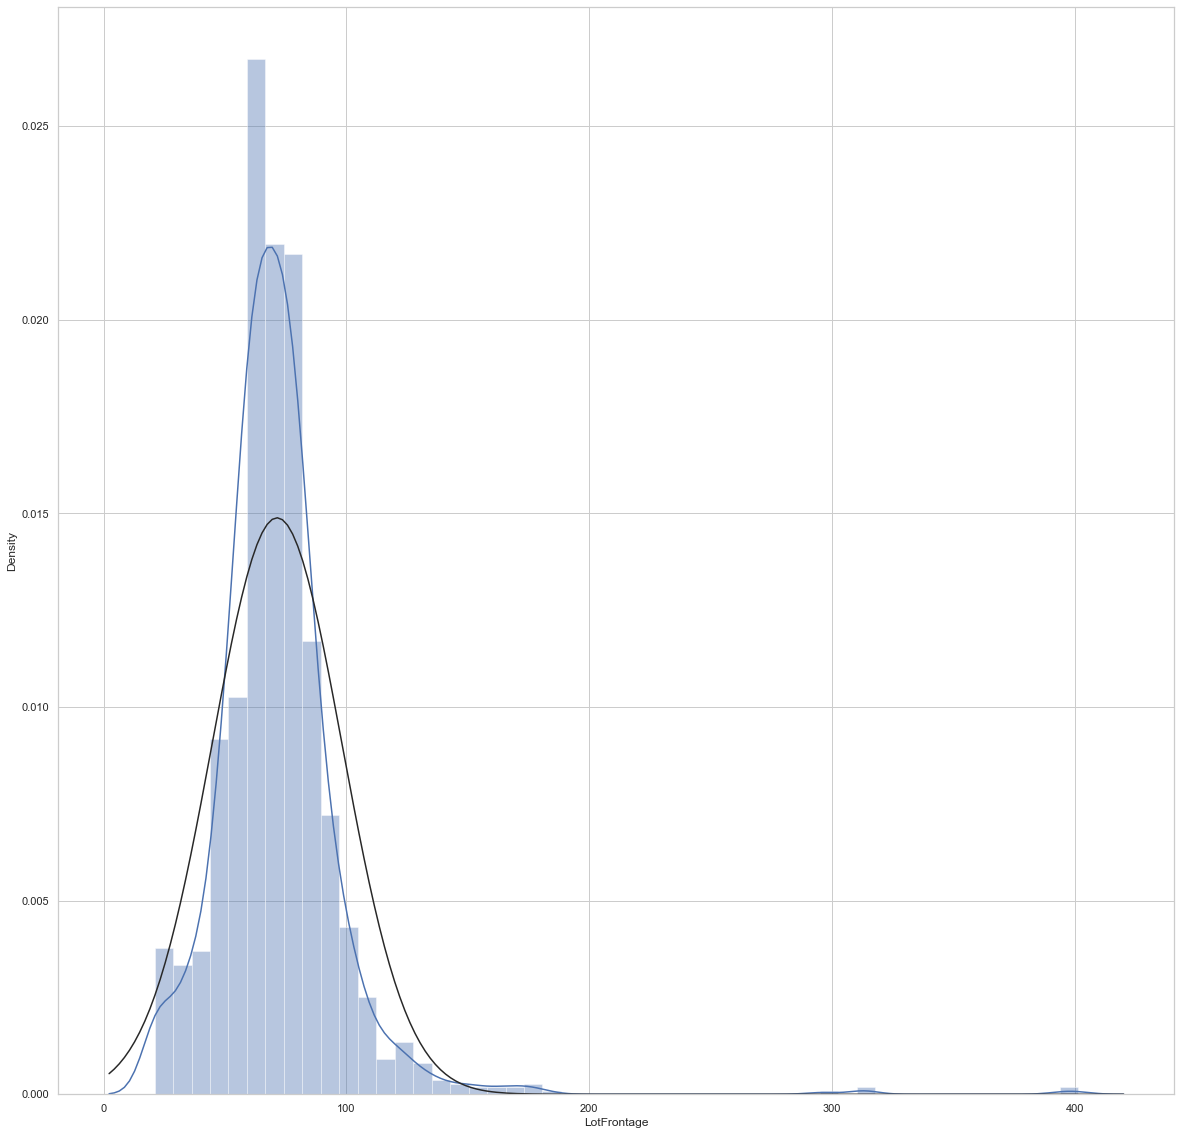

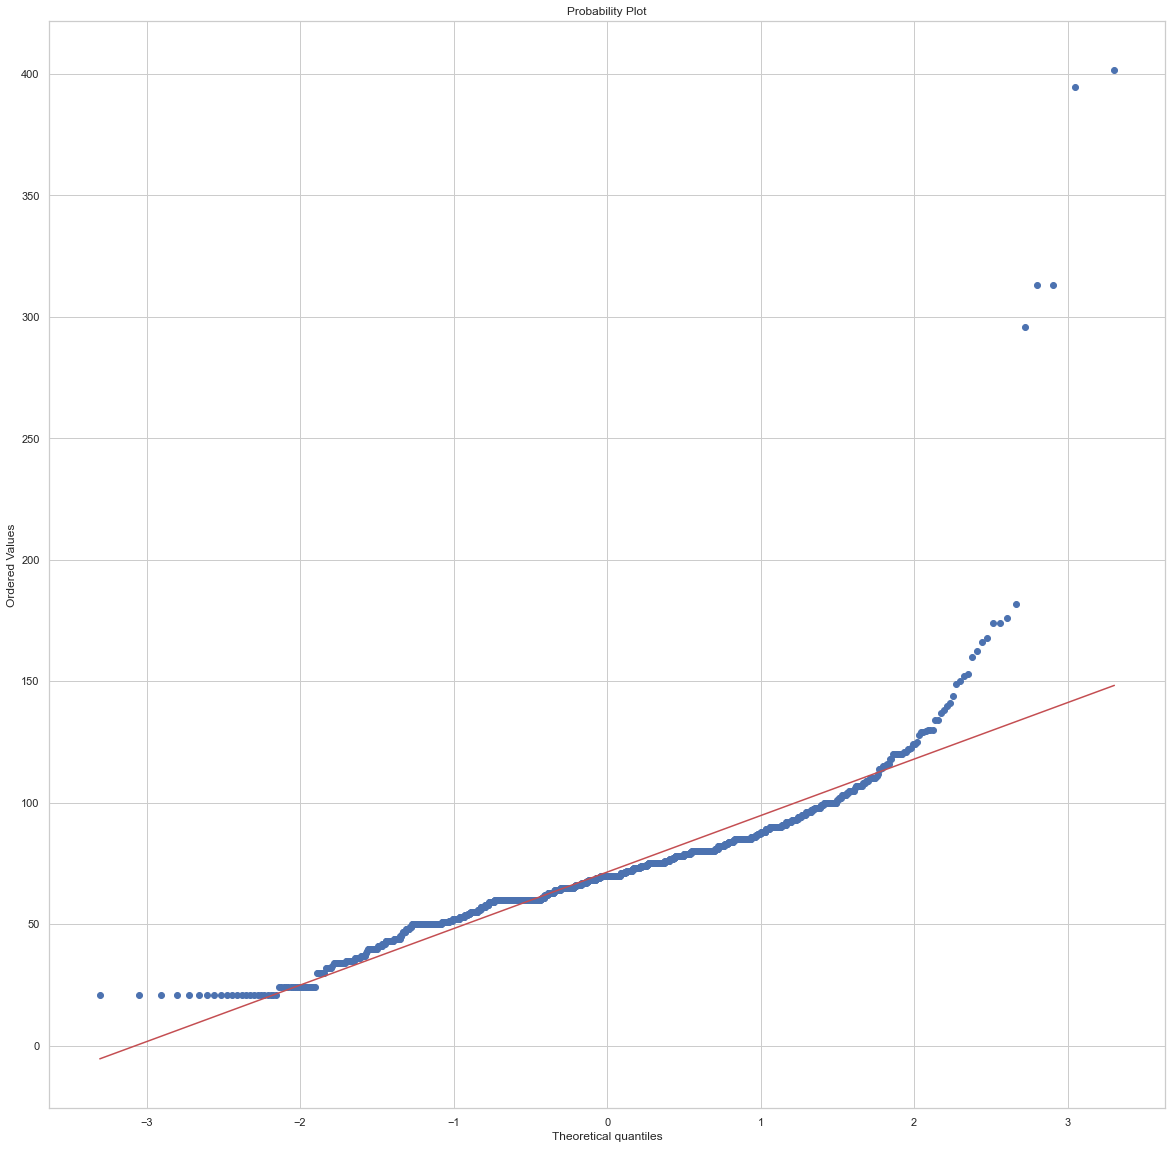

In [28]:
#Checking the distribution of continuos variable & QQ plot for LotFrontage
sns.distplot(Y['LotFrontage'], fit=norm);
fig = plt.figure()
res = stats.probplot(Y['LotFrontage'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


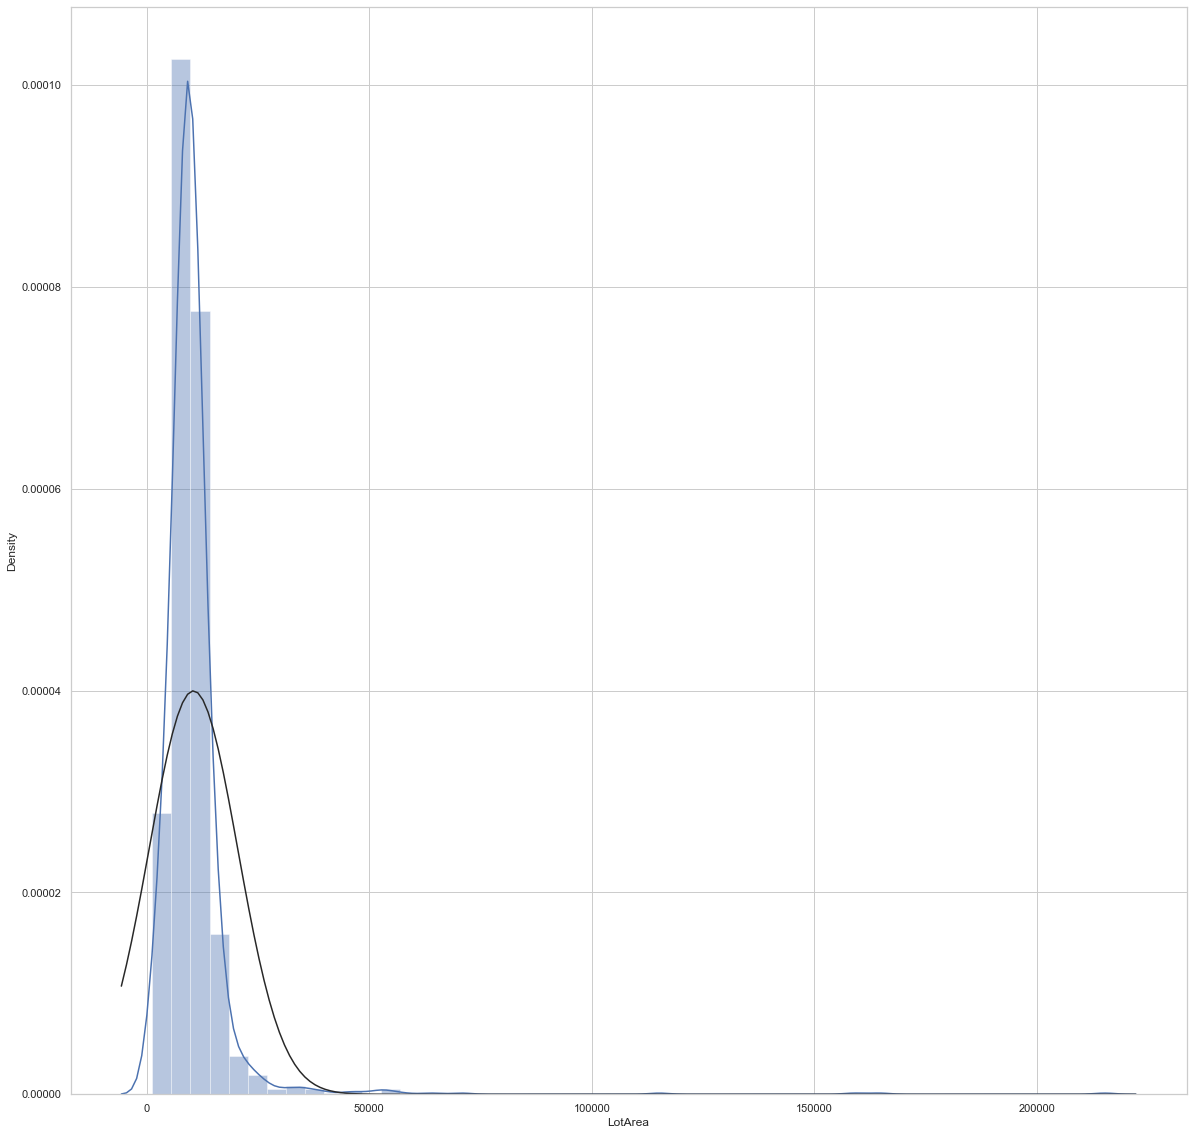

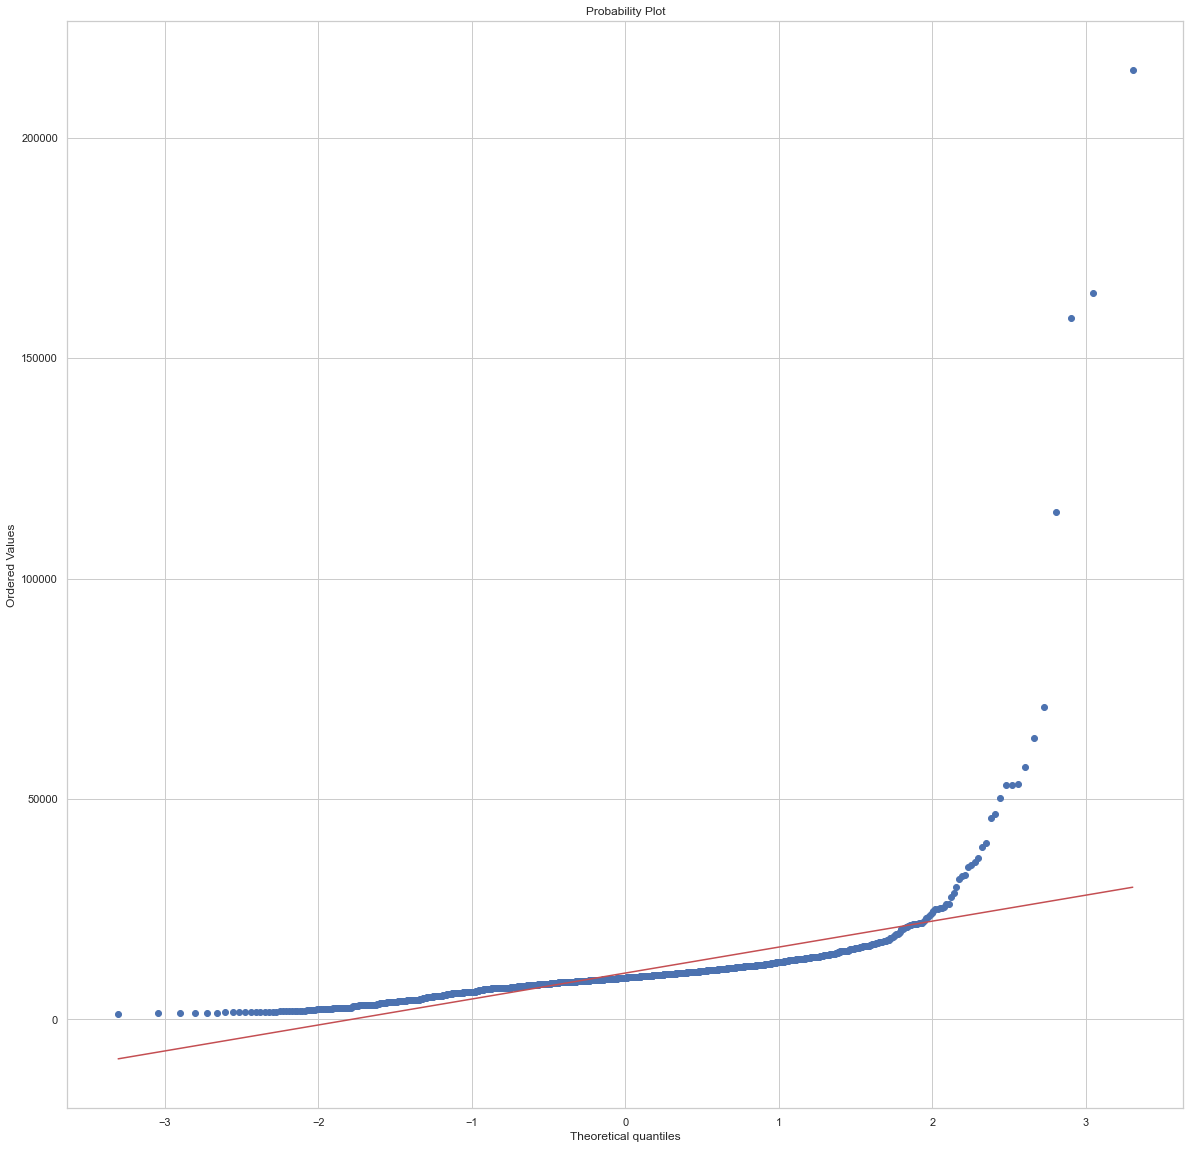

In [29]:
#Checking the distribution of continuos variable & QQ plot for LotArea
sns.distplot(Y['LotArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(Y['LotArea'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


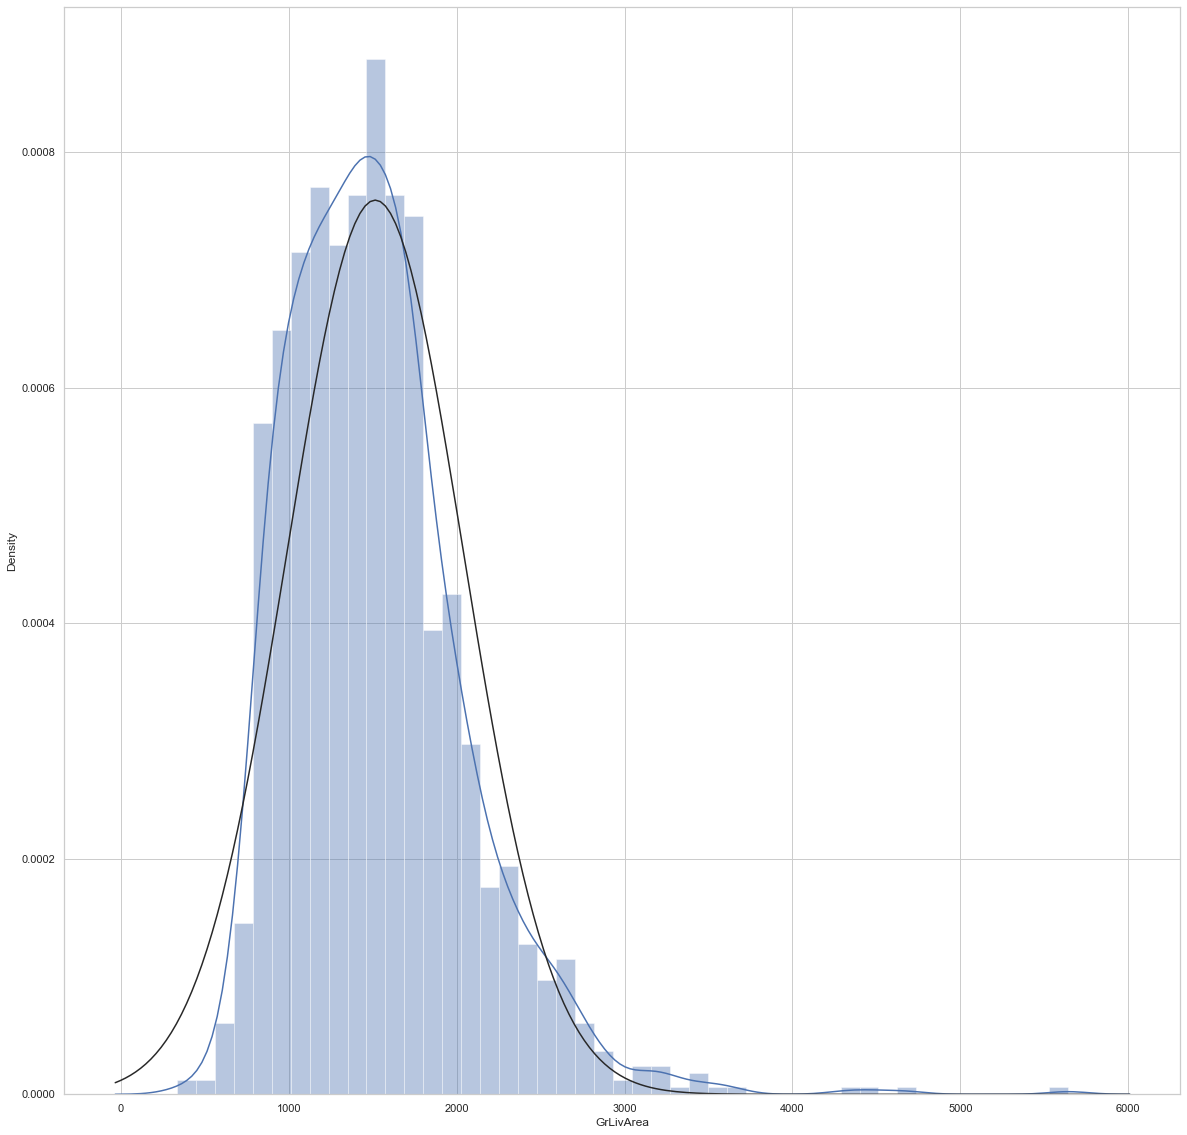

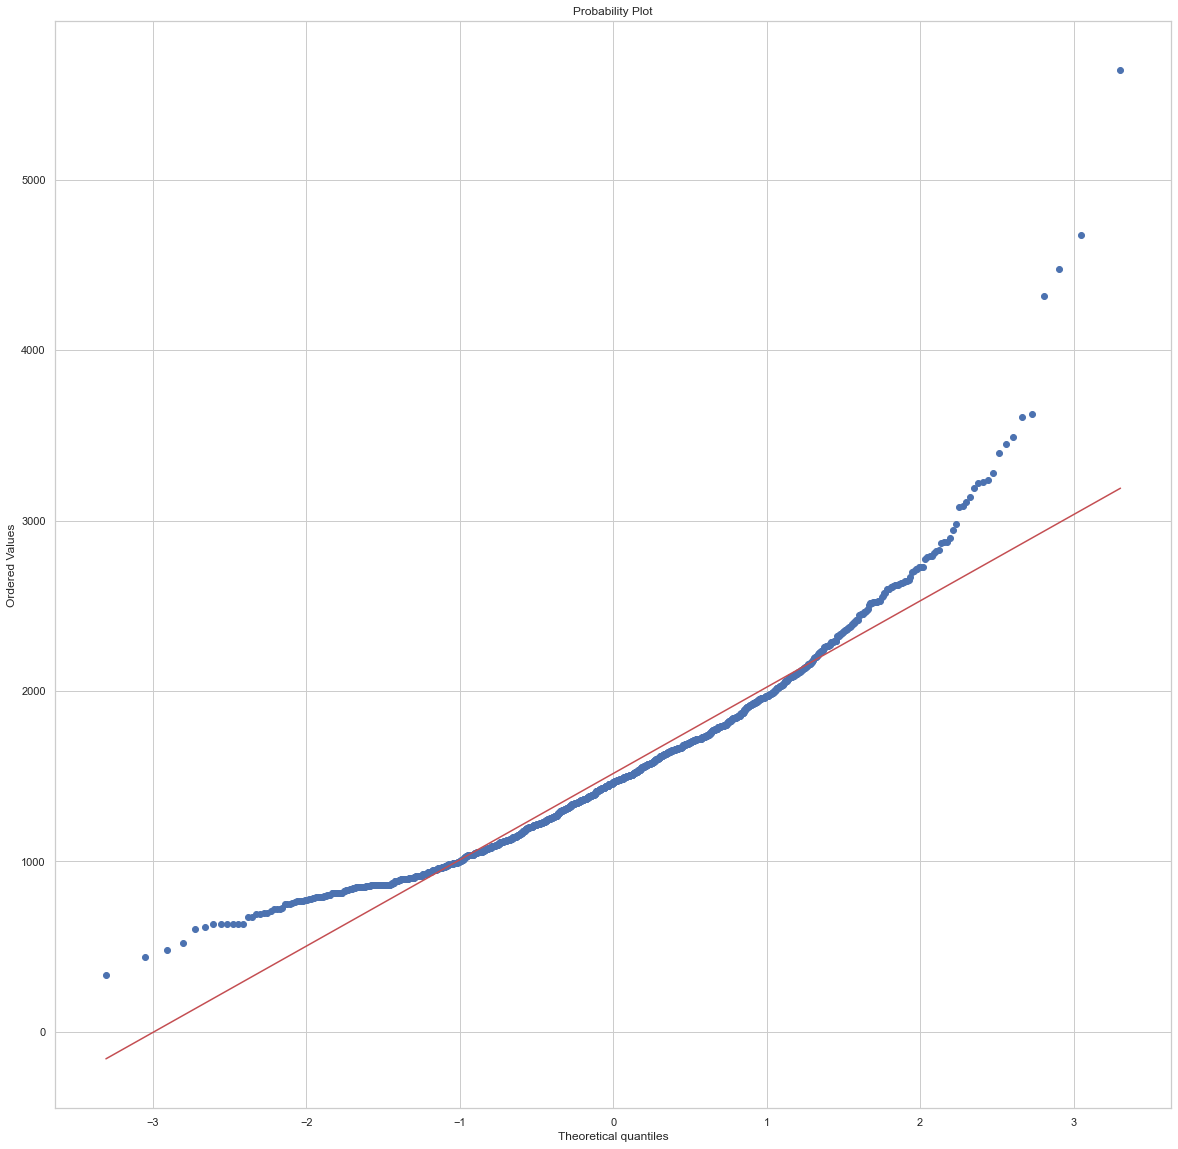

In [30]:
#Checking the distribution of continuos variable & QQ plot for GrLivArea
sns.distplot(Y['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(Y['GrLivArea'], plot=plt)

In [ ]:
#Removing the outlier 

In [31]:
Q1_lot_area = Y['LotArea'].quantile(0.25)
Q3_lot_area = Y['LotArea'].quantile(0.75)
IQR_lot = Q3_lot_area - Q1_lot_area
Y = Y[~((Y['LotArea'] < (Q1_lot_area - 1.5 * IQR_lot)) |(Y['LotArea'] > (Q3_lot_area + 1.5 * IQR_lot)))]

Q1_griv = Y['GrLivArea'].quantile(0.25)
Q3_griv = Y['GrLivArea'].quantile(0.75)
IQR_griv = Q3_griv - Q1_griv
Y = Y[~((Y['GrLivArea'] < (Q1_griv - 1.5 * IQR_griv)) |(Y['GrLivArea'] > (Q3_griv + 1.5 * IQR_griv)))]

Q1_lotfront = Y['LotFrontage'].quantile(0.25)
Q3_lotfront = Y['LotFrontage'].quantile(0.75)
IQR_front = Q3_griv - Q1_griv
Y = Y[~((Y['LotFrontage'] < (Q1_lotfront - 1.5 * IQR_front)) |(Y['LotFrontage'] > (Q3_lotfront + 1.5 * IQR_front)))]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


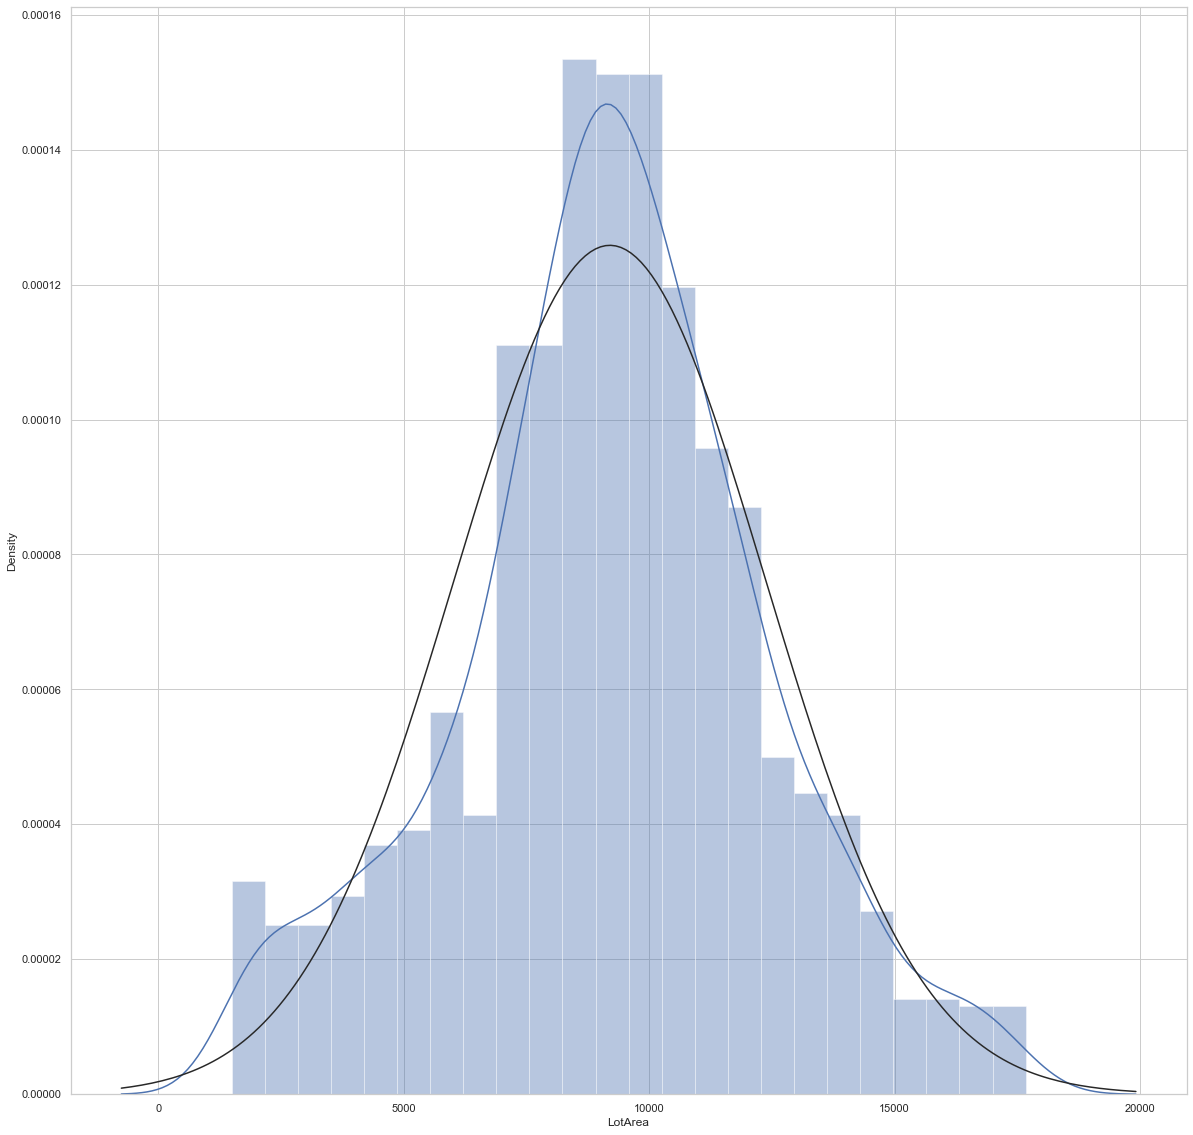

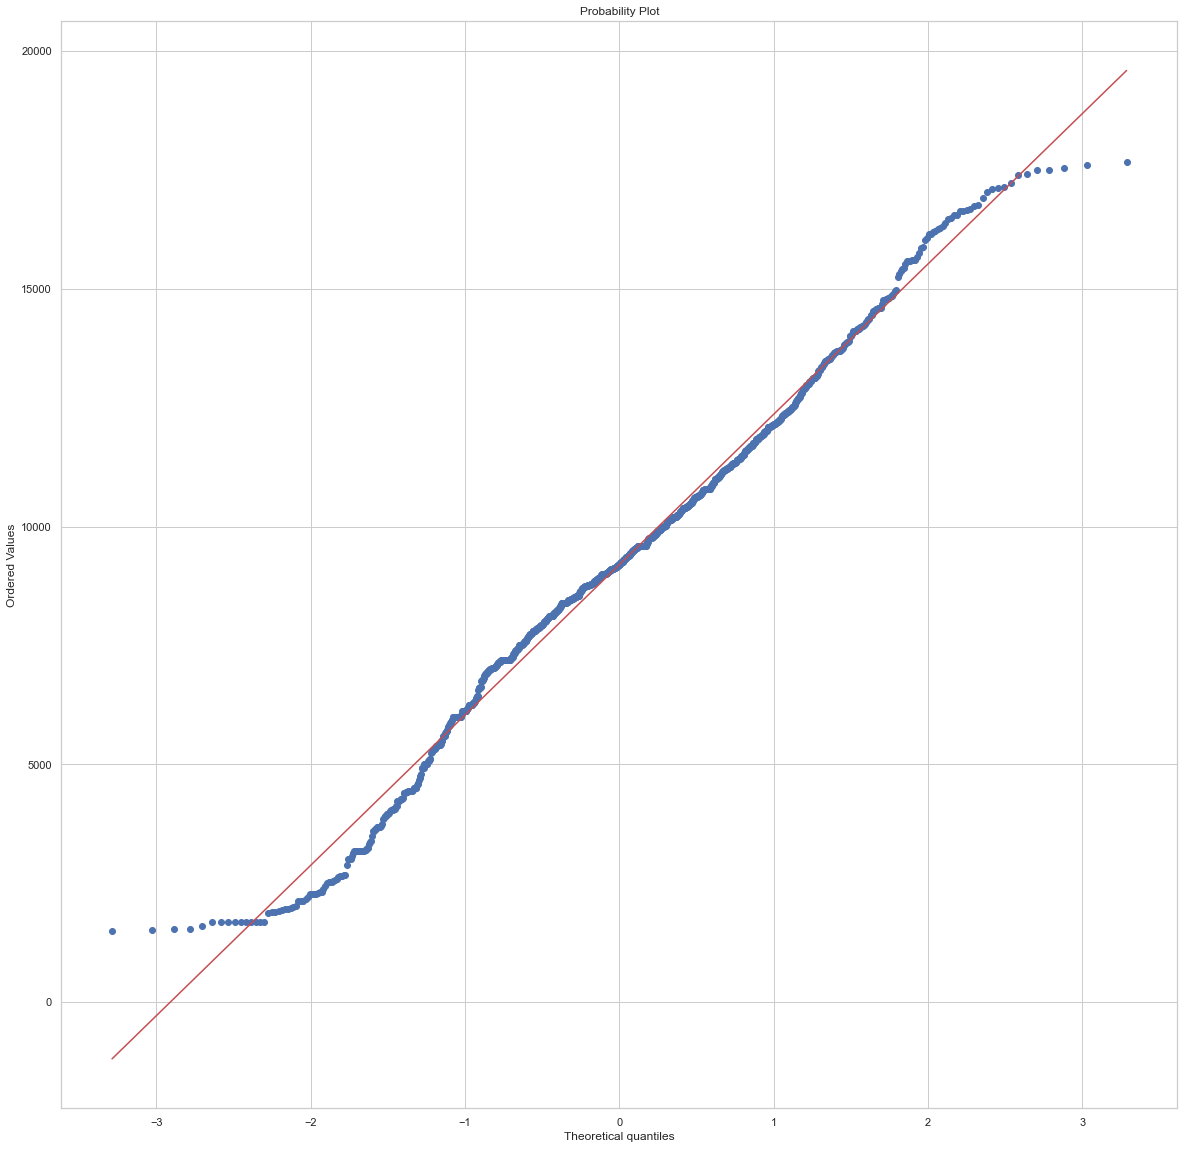

In [32]:
#plot for LOtArea after removing the outlier
sns.distplot(Y['LotArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(Y['LotArea'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


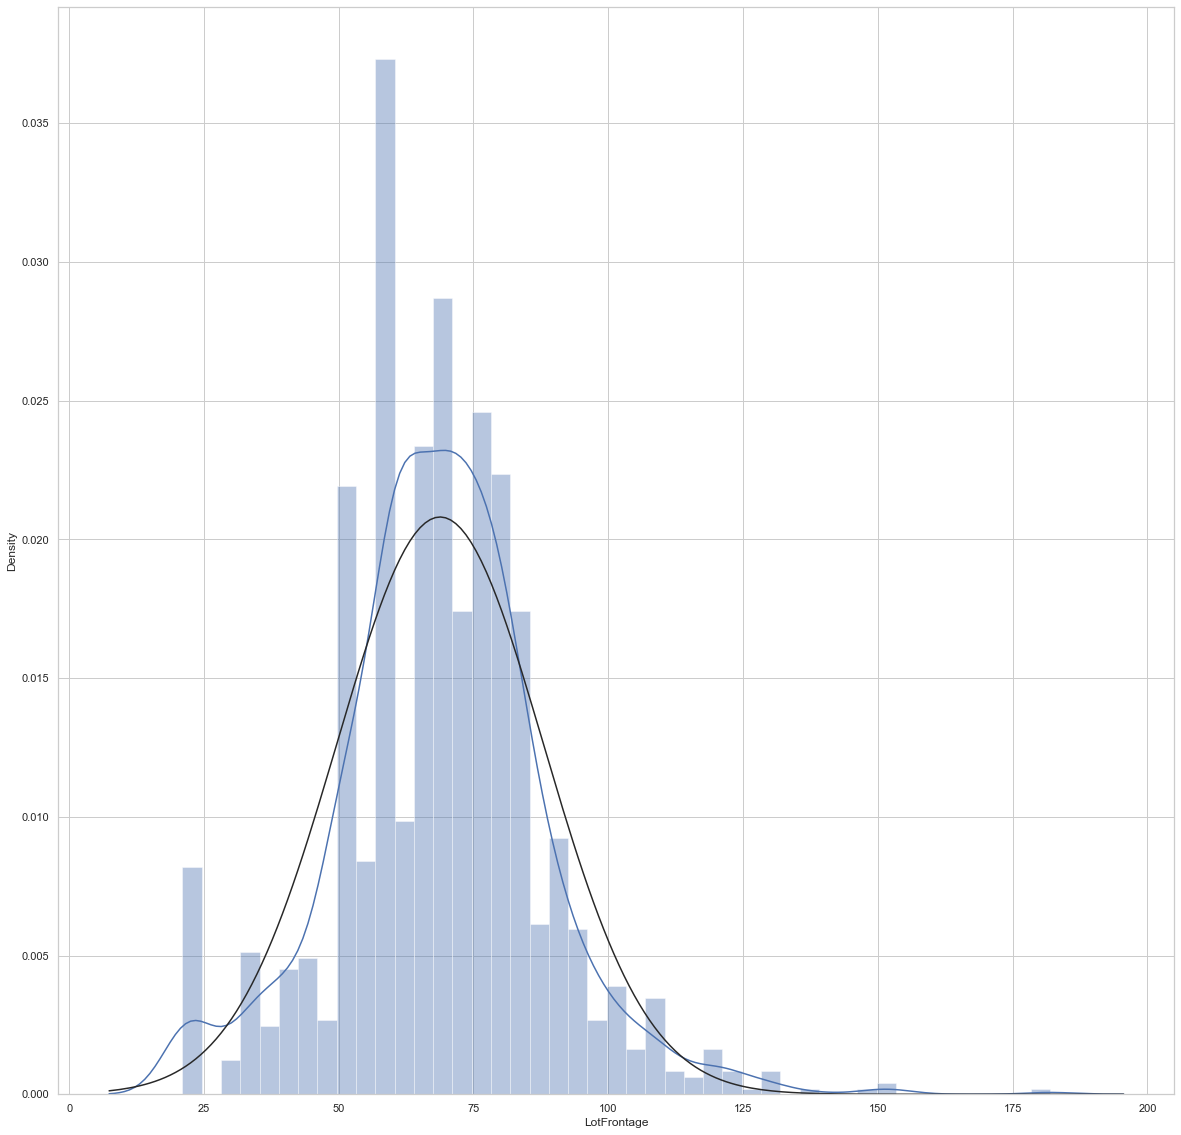

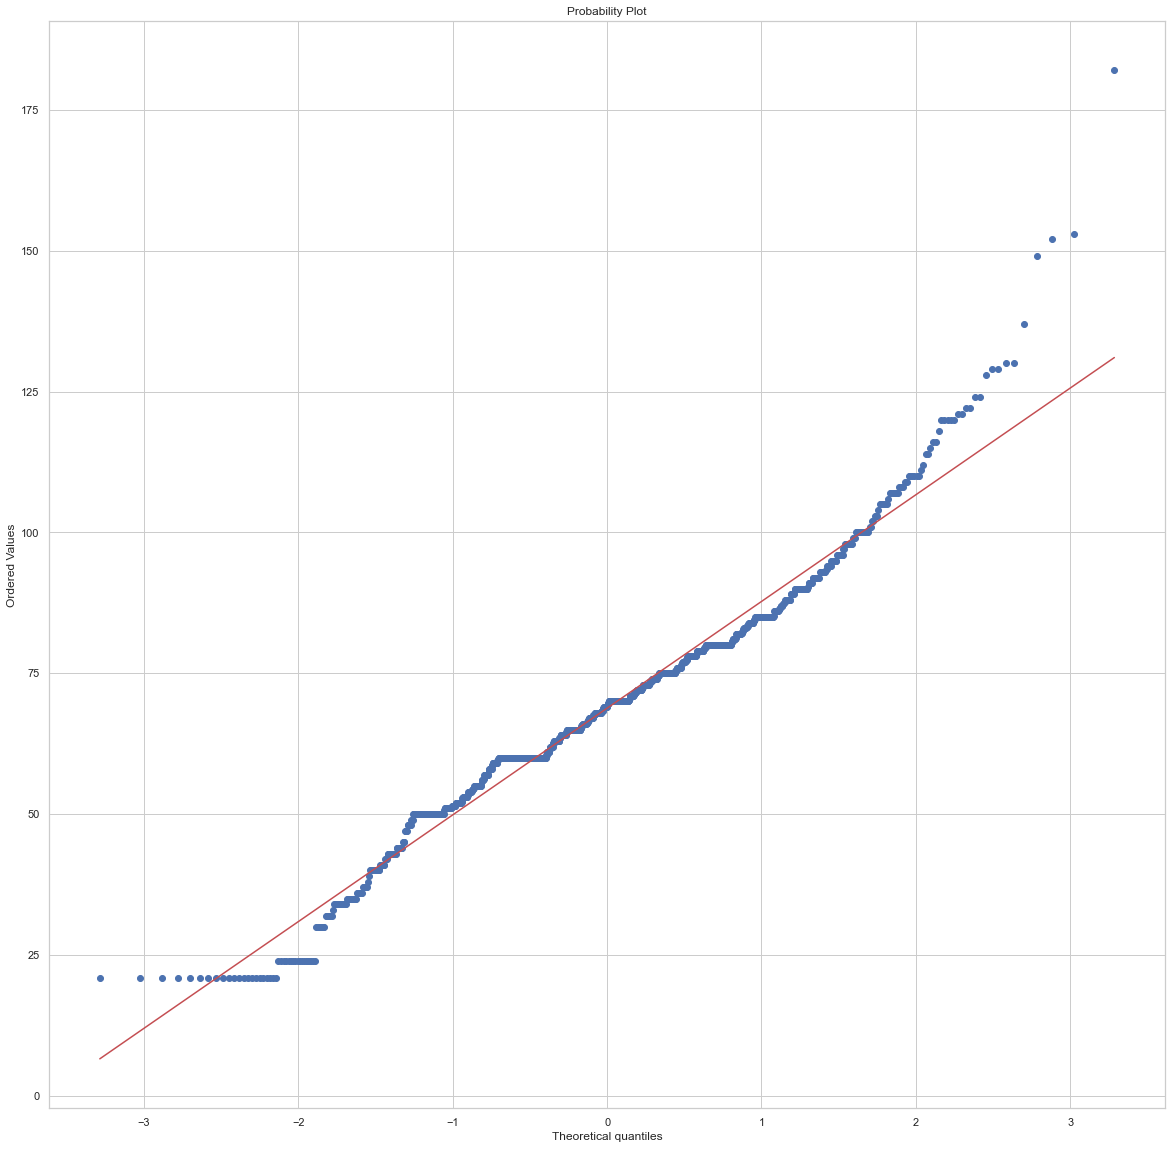

In [33]:
#plot for LotFrontage after removing the outlier
sns.distplot(Y['LotFrontage'], fit=norm);
fig = plt.figure()
res = stats.probplot(Y['LotFrontage'], plot=plt)

In [34]:

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Neighborhood','HouseStyle','Street'

Y['Neighborhood']= label_encoder.fit_transform(Y['Neighborhood'])
Y['HouseStyle']= label_encoder.fit_transform(Y['HouseStyle'])
Y['Street']= label_encoder.fit_transform(Y['Street'])
Y['House_Age']=2021-Y['YearBuilt']
X_final=Y.loc[:, Y.columns != 'SalePrice']
Y_final=Y.loc[:, 'SalePrice']

In [ ]:
#Train test split

In [35]:
X_train, X_validation, y_train, y_cv = train_test_split(X_final, Y_final, test_size=0.1, random_state=42)

In [36]:
#Standard Scaler
column=['LotFrontage','LotArea','GrLivArea']
sc=StandardScaler()

X_train[column]=sc.fit_transform(X_train[column])
X_validation[column]=sc.transform(X_validation[column])



<ipython-input-36-990a18894e2e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column]=sc.fit_transform(X_train[column])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-36-990a18894e2e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

# Linear Regression Baseline

In [37]:
# Baseline Model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
predictions=lm.predict(X_validation)

In [39]:
print("MAE:", metrics.mean_absolute_error(y_cv, predictions))
print('MSE:', metrics.mean_squared_error(y_cv, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv, predictions)))

MAE: 19702.328467153286
MSE: 735525946.7518249
RMSE: 27120.58160791956


In [ ]:
#Test data

In [40]:
df_test=pd.read_csv(r'C:\Users\Paritosh Kumar\Desktop\dataset\DataSet_Test.csv')

In [42]:
#code to impute the missing value
df_impute=df_test.loc[:,['LotFrontage','LotArea','OverallQual','OverallCond','GrLivArea','FullBath','BedroomAbvGr','KitchenAbvGr']]
missing_bill =df_impute['LotFrontage'].isnull()
tip_miss= pd.DataFrame(df_impute.loc[ : , df_impute.columns != 'LotFrontage'][missing_bill])
bill_pred=lm_impute.predict(tip_miss)
missing_bill =df_impute['LotFrontage'].isnull()
df_test.loc[df_test['LotFrontage'].isnull()==True,'LotFrontage']=bill_pred

In [45]:
# Encode labels in column 'species'.
df_test['Neighborhood']= label_encoder.fit_transform(df_test['Neighborhood'])
df_test['HouseStyle']= label_encoder.fit_transform(df_test['HouseStyle'])
df_test['Street']= label_encoder.fit_transform(df_test['Street'])

In [46]:
df_test[column]=sc.transform(df_test[column])
df_test['House_Age']=2021-df_test['YearBuilt']
df_test=df_test.drop(['Id'],axis=1)

In [47]:
df_t=df_test.loc[:,df_test.columns!= 'SalePrice']

In [48]:
df_t=df_t.dropna()
predictions=lm.predict(df_t)
df_t['Sales_price']=predictions

In [50]:
df_t.to_csv('linear_regression_base_line_new.csv')

# XGboost Base line

In [51]:
X_train, X_validation, y_train, y_cv = train_test_split(X_final, Y_final, test_size=0.1, random_state=42)

In [52]:
from xgboost import XGBRegressor
regressor  = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
Y_pred_train = regressor.predict(X_train)

In [54]:
y_pred = regressor.predict(X_validation)

In [55]:
predictions=regressor.predict(X_validation)
print("MAE:", metrics.mean_absolute_error(y_cv, predictions))
print('MSE:', metrics.mean_squared_error(y_cv, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv, predictions)))

MAE: 16346.428119297445
MSE: 473388943.136971
RMSE: 21757.503145741954


In [56]:
df_test=pd.read_csv(r'C:\Users\Paritosh Kumar\Desktop\dataset\DataSet_Test.csv')
df_test['Neighborhood']= label_encoder.fit_transform(df_test['Neighborhood'])
df_test['HouseStyle']= label_encoder.fit_transform(df_test['HouseStyle'])
df_test['Street']= label_encoder.fit_transform(df_test['Street'])
df_test['House_Age']=2021-df_test['YearBuilt']

In [57]:
df_impute=df_test.loc[:,['LotFrontage','LotArea','OverallQual','OverallCond','GrLivArea','FullBath','BedroomAbvGr','KitchenAbvGr']]
missing_bill =df_impute['LotFrontage'].isnull()
tip_miss= pd.DataFrame(df_impute.loc[ : , df_impute.columns != 'LotFrontage'][missing_bill])
bill_pred=lm_impute.predict(tip_miss)
missing_bill =df_impute['LotFrontage'].isnull()
df_test.loc[df_test['LotFrontage'].isnull()==True,'LotFrontage']=bill_pred

In [58]:
df_test=df_test.drop(['Id'],axis=1)

In [59]:
df_t=df_test.loc[:,df_test.columns!= 'SalePrice']
df_t=df_t.dropna()
predictions=regressor.predict(df_t)

In [60]:
df_t['Sales_price']=predictions

In [61]:
df_t.to_csv('xgb_regression_base_line_new.csv')

# Random Forest regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
rf.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [63]:
predictions=rf.predict(X_validation)

In [64]:
predictions=rf.predict(X_validation)
print("MAE:", metrics.mean_absolute_error(y_cv, predictions))
print('MSE:', metrics.mean_squared_error(y_cv, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv, predictions)))

MAE: 15102.540231143552
MSE: 457041166.20989615
RMSE: 21378.52114178846


In [65]:
df_x=df_t.loc[:, df_t.columns != 'Sales_price']

In [66]:
predictions=rf.predict(df_x)

In [67]:
df_x['Sales_price']=predictions

In [69]:
df_x.to_csv('random_forest_regression_base_line_new_new.csv')

# Hyperparameter tuning

In [70]:
# find optimal alpha with grid search
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363560286346.5176, tolerance: 593171448.906763
  model = cd_fast.enet_coordinate_descent(


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -20782.531346827705
Best Params:  {'alpha': 10}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364379169654.87103, tolerance: 593171448.906763
  model = cd_fast.enet_coordinate_descent(


In [71]:
x_cfl=Lasso(alpha=10)
x_cfl.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364379169654.87103, tolerance: 593171448.906763
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

In [72]:
predictions=x_cfl.predict(X_validation)
print("MAE:", metrics.mean_absolute_error(y_cv, predictions))
print('MSE:', metrics.mean_squared_error(y_cv, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv, predictions)))

In [73]:
df_test=pd.read_csv(r'C:\Users\Paritosh Kumar\Desktop\dataset\DataSet_Test.csv')

In [74]:
# Encode labels in column 'species'.
df_test['Neighborhood']= label_encoder.fit_transform(df_test['Neighborhood'])
df_test['HouseStyle']= label_encoder.fit_transform(df_test['HouseStyle'])
df_test['Street']= label_encoder.fit_transform(df_test['Street'])

In [75]:
#Imputing the missing value from linear regression model

df_impute=df_test.loc[:,['LotFrontage','LotArea','OverallQual','OverallCond','GrLivArea','FullBath','BedroomAbvGr','KitchenAbvGr']]
missing_bill =df_impute['LotFrontage'].isnull()
tip_miss= pd.DataFrame(df_impute.loc[ : , df_impute.columns != 'LotFrontage'][missing_bill])
bill_pred=lm_impute.predict(tip_miss)
missing_bill =df_impute['LotFrontage'].isnull()
df_test.loc[df_test['LotFrontage'].isnull()==True,'LotFrontage']=bill_pred

In [76]:
df_test[column]=sc.transform(df_test[column])
df_test['House_Age']=2021-df_test['YearBuilt']
df_test=df_test.drop(['Id'],axis=1)

In [77]:
df_t=df_test.loc[:,df_test.columns!= 'SalePrice']
df_t=df_t.dropna()
predictions=x_cfl.predict(df_t)
df_t['Sales_price']=predictions

In [78]:
df_t.to_csv('lasso_regression_base_line_new.csv')

# Random search hyperparameter tuning xgboost

In [80]:
from sklearn.model_selection import RandomizedSearchCV
x_cfl_rf=XGBRegressor()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl_rf,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample

In [81]:
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1}


Fit the XGBregrossor with the best hyperparameter

In [83]:

x_cfl=XGBRegressor(n_estimators=100, learning_rate=0.1, colsample_bytree=1, max_depth=10,subsample=0.5)
x_cfl.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
predictions=x_cfl.predict(X_validation)
print("MAE:", metrics.mean_absolute_error(y_cv, predictions))
print('MSE:', metrics.mean_squared_error(y_cv, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv, predictions)))

In [84]:
df_t=df_test.loc[:,df_test.columns!= 'SalePrice']
predictions=x_cfl.predict(df_t)
df_t['Sales_price']=predictions

In [85]:
df_t.to_csv('xgboost_regression_base_line_new.csv')

In [ ]:
#note Xgboost with hyperameter has the Best MAE 